# 1. Random Walk

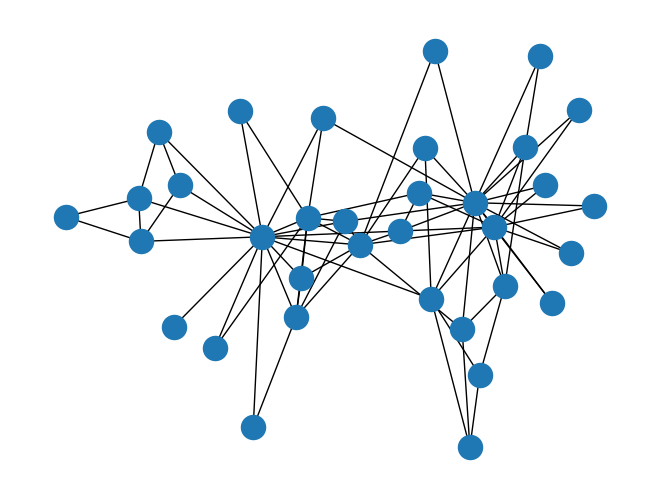

In [1]:
import networkx as nx
import random

# Import the Karate Club graph using NetworkX and create an adjacency matrix
karate_graph = nx.karate_club_graph()
adjacency_list = nx.adjacency_matrix(karate_graph, dtype=int)
adjacency_matrix_array = adjacency_list.toarray()

nx.draw(karate_graph)

In [2]:
adjacency_matrix_array

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]], shape=(34, 34))

In [3]:
def random_walk(adj_list, node, walk_length):
  walk = [node]   # Walk starts from this node

  for i in range(walk_length-1):
    node = adj_list[node][random.randint(0,len(adj_list[node])-1)]
    walk.append(node)

  return walk

# Perform random walks on the graph
num_walks = 6

for node in karate_graph.nodes():
  print("Node " + str(node) + " :" + str(random_walk(adjacency_matrix_array, node, num_walks)))

Node 0 :[0, np.int64(3), np.int64(0), np.int64(0), np.int64(2), np.int64(0)]
Node 1 :[1, np.int64(1), np.int64(0), np.int64(0), np.int64(3), np.int64(0)]
Node 2 :[2, np.int64(6), np.int64(0), np.int64(0), np.int64(2), np.int64(5)]
Node 3 :[3, np.int64(0), np.int64(0), np.int64(4), np.int64(0), np.int64(2)]
Node 4 :[4, np.int64(0), np.int64(2), np.int64(0), np.int64(1), np.int64(5)]
Node 5 :[5, np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(0)]
Node 6 :[6, np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2)]
Node 7 :[7, np.int64(0), np.int64(4), np.int64(0), np.int64(0), np.int64(0)]
Node 8 :[8, np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(3)]
Node 9 :[9, np.int64(0), np.int64(2), np.int64(0), np.int64(0), np.int64(0)]
Node 10 :[10, np.int64(3), np.int64(0), np.int64(2), np.int64(3), np.int64(0)]
Node 11 :[11, np.int64(0), np.int64(0), np.int64(3), np.int64(0), np.int64(3)]
Node 12 :[12, np.int64(0), np.int64(0), np.int64(3), np.int64(0), np.int

# SkipGram

In [7]:
import torch
import torch.nn as nn

In [8]:
class Model(torch.nn.Module):
    def __init__(self, size_vertex):
        super(Model, self).__init__()
        self.phi  = nn.Parameter(torch.rand((size_vertex, d), requires_grad=True))
        self.phi2 = nn.Parameter(torch.rand((d, size_vertex), requires_grad=True))


    def forward(self, one_hot):
        hidden = torch.matmul(one_hot, self.phi)
        out    = torch.matmul(hidden, self.phi2)
        return out

In [9]:
def skip_gram(model, wvi, w, size_vertex):
  for j in range(len(wvi)):
    for k in range(max(0,j-w) , min(j+w, len(wvi))):
      #generate one hot vector
      one_hot          = torch.zeros(size_vertex)
      one_hot[wvi[j]]  = 1

      out              = model(one_hot)
      loss             = torch.log(torch.sum(torch.exp(out))) - out[wvi[k]]
      loss.backward()

      for param in model.parameters():
          param.data.sub_(lr*param.grad)
          param.grad.data.zero_()

In [10]:
w = 3 # window size
d = 2 # embedding size
y = 200 # walks per vertex
num_walk = 6 # walk length
lr = 0.025 # learning rate
size_vertex = karate_graph.number_of_nodes() # Number of nodes
nodes_list = list(karate_graph.nodes())

In [11]:
# Running random walk and skip gram
model = Model(size_vertex)

for i in range(y):
  random.shuffle(nodes_list)
  for node in karate_graph.nodes():
    wvi = random_walk(adjacency_matrix_array, node, num_walks)
    skip_gram(model, wvi, w, size_vertex)

print(model.phi)

Parameter containing:
tensor([[ 0.6518,  1.4779],
        [ 1.7853,  0.4076],
        [ 1.2810,  0.8626],
        [ 0.0699,  1.7097],
        [ 0.7092,  1.1627],
        [ 1.6842,  0.5715],
        [ 1.9098,  0.2354],
        [ 0.3541,  1.1937],
        [ 0.3870,  1.0827],
        [ 0.7249,  0.7474],
        [ 0.5170,  1.0167],
        [ 0.7340,  0.8648],
        [ 1.1218,  0.6444],
        [ 0.0810,  1.3904],
        [ 1.1411,  0.5624],
        [ 0.8529,  0.7728],
        [ 0.0882,  1.3678],
        [ 0.8060,  0.8329],
        [ 1.6702,  0.2671],
        [ 1.3028,  0.3855],
        [ 0.3947,  1.1158],
        [ 0.5386,  1.0477],
        [ 0.4348,  1.1170],
        [ 0.8349,  0.6005],
        [ 0.9112,  0.6931],
        [ 0.8739,  0.7018],
        [ 0.3248,  1.2107],
        [ 1.9428,  0.0806],
        [ 0.2199,  1.2355],
        [ 0.5549,  1.0869],
        [ 0.5760,  0.9414],
        [ 0.0386,  1.2723],
        [-0.6638,  1.9440],
        [ 0.0129,  1.3726]], requires_grad=True)
